In [505]:
import pandas as pd

data = pd.read_csv("DataFiles/PruneLatencyNoTraining.csv", header='infer')

In [506]:
def remove_unwated_columns(data):
    return data.drop(['Name', 'Agent', 'Notes', 'User', 'Tags', 'Created', 'Sweep'], axis=1)

def get_rows_with_col_value(data, col, value):
    return data[data[col] == value]

In [507]:
data = remove_unwated_columns(data)
finished_runs = get_rows_with_col_value(data, 'State', 'finished')
finished_runs


State  Runtime  filter_pruner_20  filter_pruner_40  filter_pruner_60  \
0     finished       37          0.891275          0.840301          0.895867   
1     finished       37          0.730296          0.801089          0.971097   
2     finished       44          0.484452          0.926072          0.939492   
3     finished       38          0.924371          0.983391          0.547082   
4     finished       36          0.494629          0.893945          0.908276   
...        ...      ...               ...               ...               ...   
1574  finished       40          0.164268          0.005908          0.015461   
1575  finished       42          0.898849          0.252303          0.029231   
1576  finished       50          0.450474          0.278031          0.610577   
1577  finished       39          0.351214          0.387067          0.286195   
1578  finished       39          0.221701          0.340662          0.103303   

      filter_pruner_70  epochs  learning_rate  Latency   Loss  Throughput  \
0             0.985729     NaN            NaN    3.277  1.888      306.43   
1             0.981776     NaN            NaN    3.279  1.861      305.91   
2             0.988535     NaN            NaN    3.296  1.808      306.97   
3             0.962719     NaN            NaN    3.314  2.070      306.13   
4             0.971079     NaN            NaN    3.319  1.875      293.56   
...                ...     ...            ...      ...    ...         ...   
1574          0.203389     NaN            NaN    4.432  1.731      300.43   
1575          0.273782     NaN            NaN    4.434  1.880      299.79   
1576          0.044756     NaN            NaN    4.448  2.089      303.99   
1577          0.027830     NaN            NaN    4.453  1.816      297.79   
1578          0.499863     NaN            NaN    4.470  1.848      302.64   

       Top1   Top5  Total_Latency  
0     25.28  82.85          12.93  
1     28.27  82.74          12.89  
2     32.86  84.44          12.93  
3     26.01  83.01          12.94  
4     29.74  84.40          12.93  
...     ...    ...            ...  
1574  34.30  87.11          13.18  
1575  26.30  82.15          13.04  
1576  19.28  76.51          12.99  
1577  30.40  84.35          13.00  
1578  31.37  83.20          13.05  

[1579 rows x 14 columns]

In [508]:
# Count number of failed experiements
# Count number of experiments with a top1==100/|classes|
# Remove name, agent, notes, user, tags, created, sweep columns
# Find how reducing the inference latency effects the total latency

In [509]:
latency_data = finished_runs.drop(['State', 'Runtime', 'epochs', 'learning_rate'], axis=1)
latency_data

filter_pruner_20  filter_pruner_40  filter_pruner_60  filter_pruner_70  \
0             0.891275          0.840301          0.895867          0.985729   
1             0.730296          0.801089          0.971097          0.981776   
2             0.484452          0.926072          0.939492          0.988535   
3             0.924371          0.983391          0.547082          0.962719   
4             0.494629          0.893945          0.908276          0.971079   
...                ...               ...               ...               ...   
1574          0.164268          0.005908          0.015461          0.203389   
1575          0.898849          0.252303          0.029231          0.273782   
1576          0.450474          0.278031          0.610577          0.044756   
1577          0.351214          0.387067          0.286195          0.027830   
1578          0.221701          0.340662          0.103303          0.499863   

      Latency   Loss  Throughput   Top1   Top5  Total_Latency  
0       3.277  1.888      306.43  25.28  82.85          12.93  
1       3.279  1.861      305.91  28.27  82.74          12.89  
2       3.296  1.808      306.97  32.86  84.44          12.93  
3       3.314  2.070      306.13  26.01  83.01          12.94  
4       3.319  1.875      293.56  29.74  84.40          12.93  
...       ...    ...         ...    ...    ...            ...  
1574    4.432  1.731      300.43  34.30  87.11          13.18  
1575    4.434  1.880      299.79  26.30  82.15          13.04  
1576    4.448  2.089      303.99  19.28  76.51          12.99  
1577    4.453  1.816      297.79  30.40  84.35          13.00  
1578    4.470  1.848      302.64  31.37  83.20          13.05  

[1579 rows x 10 columns]

In [510]:


# Correlation between Inference Latency and the Total Latency
il_tl_corr = latency_data['Latency'].corr(latency_data['Total_Latency'])

# Correlations between each pruner and the inference Latency
fp_20_corr = latency_data['filter_pruner_20'].corr(latency_data['Latency'])
fp_40_corr = latency_data['filter_pruner_40'].corr(latency_data['Latency'])
fp_60_corr = latency_data['filter_pruner_60'].corr(latency_data['Latency'])
fp_70_corr = latency_data['filter_pruner_70'].corr(latency_data['Latency'])

correlations = pd.DataFrame([(fp_20_corr, fp_40_corr, fp_60_corr, fp_70_corr, il_tl_corr)], columns=['fp_20', 'fp_40', 'fp_60', 'fp_70', 'latency_to_total'])
correlations

fp_20     fp_40    fp_60    fp_70  latency_to_total
0 -0.11259 -0.552583 -0.40775 -0.80726           0.31715

In [511]:
# Correlation between Latency and top1
t1_il_corr = latency_data['Latency'].corr(latency_data['Top1'])

# Correlations between each pruner and Top1
t1_fp_20_corr = latency_data['filter_pruner_20'].corr(latency_data['Top1'])
t1_fp_40_corr = latency_data['filter_pruner_40'].corr(latency_data['Top1'])
t1_fp_60_corr = latency_data['filter_pruner_60'].corr(latency_data['Top1'])
t1_fp_70_corr = latency_data['filter_pruner_70'].corr(latency_data['Top1'])

t1_correlations = pd.DataFrame([(t1_fp_20_corr, t1_fp_40_corr, t1_fp_60_corr, t1_fp_70_corr, t1_il_corr)], columns=['fp_20', 'fp_40', 'fp_60', 'fp_70', 'latency_to_Top1'])
t1_correlations


fp_20     fp_40     fp_60     fp_70  latency_to_Top1
0  0.004462 -0.071923 -0.104505 -0.152767         0.090325

In [515]:
import matplotlib.pyplot as plt
import numpy as np
import math

str_to_index = {'Latency': 4, 'Loss': 5, 'Throughput': 6, 'Top1': 7, 'Top5': 8, 'Total_Latency': 9, 'PCA':10}

def get_bin_type_index(name):
    bin_type_dict = {'mean': 1, 'max': 2, 'min': 3}
    bin_type = bin_type_dict.get(name)
    if bin_type is None:
        raise ValueError('Invalid bin type. Choose one of: [mean, min, max]')
    return bin_type

def build_line(nparray, col_index, against_index):
    x_vals = nparray[:,col_index]
    y_vals = nparray[:,against_index]
    return zip(*sorted(zip(x_vals, y_vals))) # x and y values, sorted by x


def plot_pruners(dataframe, against: str, title, bin_type='mean'):
    # X axis will be 0 - 1 float of pruner setting
    # Y axis is the against string

    bin_type = get_bin_type_index(bin_type)


    bin_var = 0.02

    y_axis_index = str_to_index.get(against)
    if y_axis_index is None:
        raise ValueError('Againt value not mapped to a column in the data')

    fp_20 = sorted(build_line(dataframe.to_numpy(), 0, y_axis_index))
    val_tuple = bin_to_param_step(fp_20, bin_var)
    fp_20 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fp_40 = sorted(build_line(dataframe.to_numpy(), 1, y_axis_index))
    val_tuple = bin_to_param_step(fp_40, bin_var)
    fp_40 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fp_60 = sorted(build_line(dataframe.to_numpy(), 2, y_axis_index))
    val_tuple = bin_to_param_step(fp_60, bin_var)
    fp_60 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fp_70 = sorted(build_line(dataframe.to_numpy(), 3, y_axis_index))
    val_tuple = bin_to_param_step(fp_70, bin_var)
    fp_70 = zip(val_tuple[0].tolist(), val_tuple[bin_type].tolist())

    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(*zip(*fp_20), label='Filter Pruner Layer 1')
    ax.plot(*zip(*fp_40), label='Filter Pruner Layer 2')
    ax.plot(*zip(*fp_60), label='Filter Pruner Layer 3.1')
    ax.plot(*zip(*fp_70), label='Filter Pruner Layer 3.2')

    ax.set_title(title, fontsize=25)
    ax.set_ylabel(against, fontsize=20)
    ax.set_xlabel('Target Sparsity', fontsize=20)

    ax.legend(prop={"size":16})
    plt.tight_layout()
    plt.show()




def bin_to_param_step(data, step_size: float):
    assert step_size < 1
    assert step_size > 0
    assert 100%(step_size*100) == 0

    x, y = data
    value = np.array(y)
    parameter = np.array(x)

    num_groups = math.floor(100 / (step_size*100))

    binned_mean_value = np.zeros(num_groups)
    binned_max_value = np.zeros(num_groups)
    binned_min_value = np.zeros(num_groups)
    binned_parameters = np.zeros(num_groups)


    for i in range(num_groups):
        start = i * 1/num_groups
        stop = start + 1/num_groups
        # get the min within start & stop. value, not index

        indices = np.intersect1d(np.where(parameter > start), np.where(parameter < stop))

        binned_mean_value[i] = np.mean(value[indices])
        if len(indices) > 0:
            binned_max_value[i] = np.amax(value[indices])
            binned_min_value[i] = np.amin(value[indices])
        binned_parameters[i] = start

    return binned_parameters, binned_mean_value, binned_max_value, binned_min_value


def bin_data(data, target_num_groups):
    x, y = data
    data_per_bin = int(math.ceil(len(x)/target_num_groups))
    value = np.array(y)
    parameter = np.array(x)
    
    binned_mean_value = np.zeros(target_num_groups)
    binned_max_value = np.zeros(target_num_groups)
    binned_min_value = np.zeros(target_num_groups)
    binned_parameters = np.zeros(target_num_groups)

    actual_groups = 0

    for i in range(target_num_groups):
        start = i * data_per_bin
        stop = start + data_per_bin - 1
        if (stop > len(x)):
            actual_groups = i
            break
        else:
            actual_groups = i
        binned_mean_value[i] = np.mean(value[start : stop])
        binned_max_value[i] = np.amax(value[start : stop])
        binned_min_value[i] = np.amin(value[start : stop])
        binned_parameters[i] = np.mean(parameter[start : stop])

    binned_mean_value = binned_mean_value[0:actual_groups]
    binned_max_value = binned_max_value[0:actual_groups]
    binned_min_value = binned_min_value[0:actual_groups]
    binned_parameters = binned_parameters[0:actual_groups]

    return binned_parameters, binned_mean_value, binned_max_value, binned_min_value



In [516]:
100%5

0

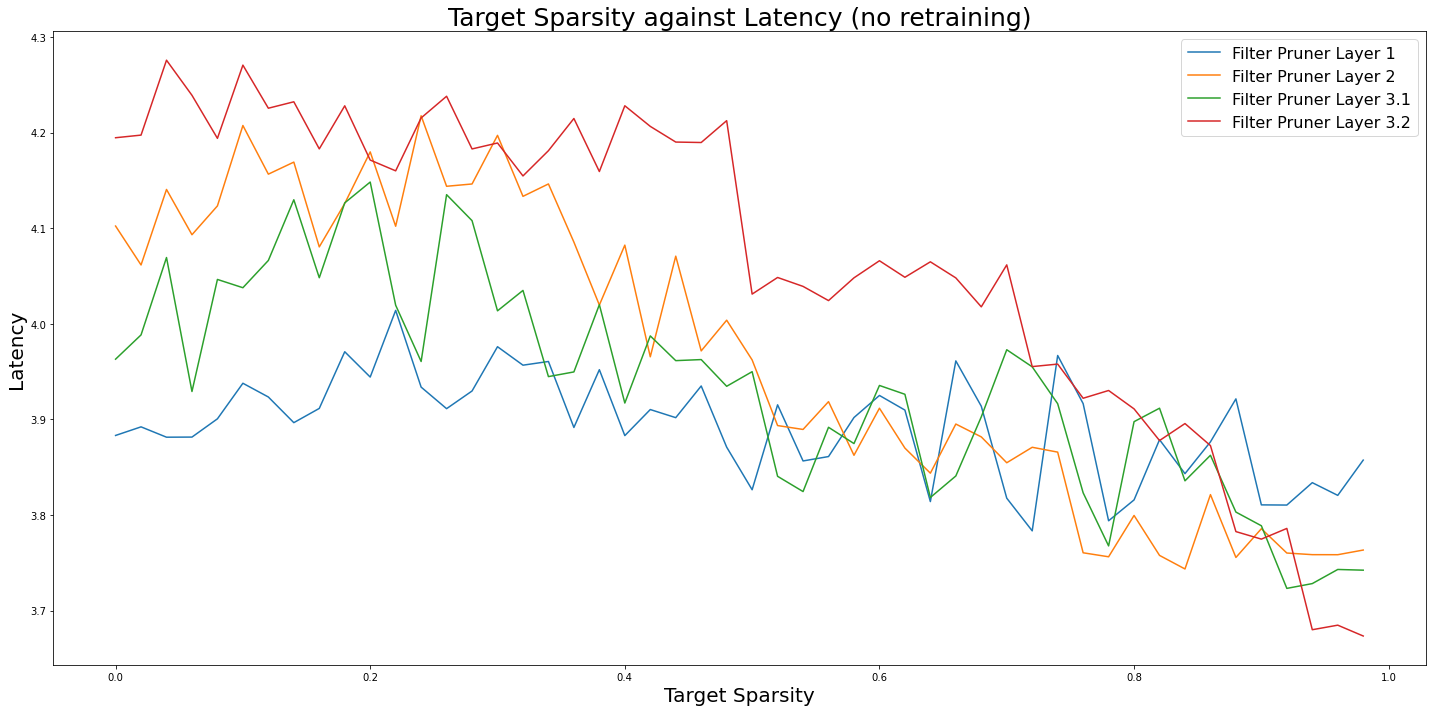

In [517]:
plot_pruners(latency_data, 'Latency', 'Target Sparsity against Latency (no retraining)', 'mean')

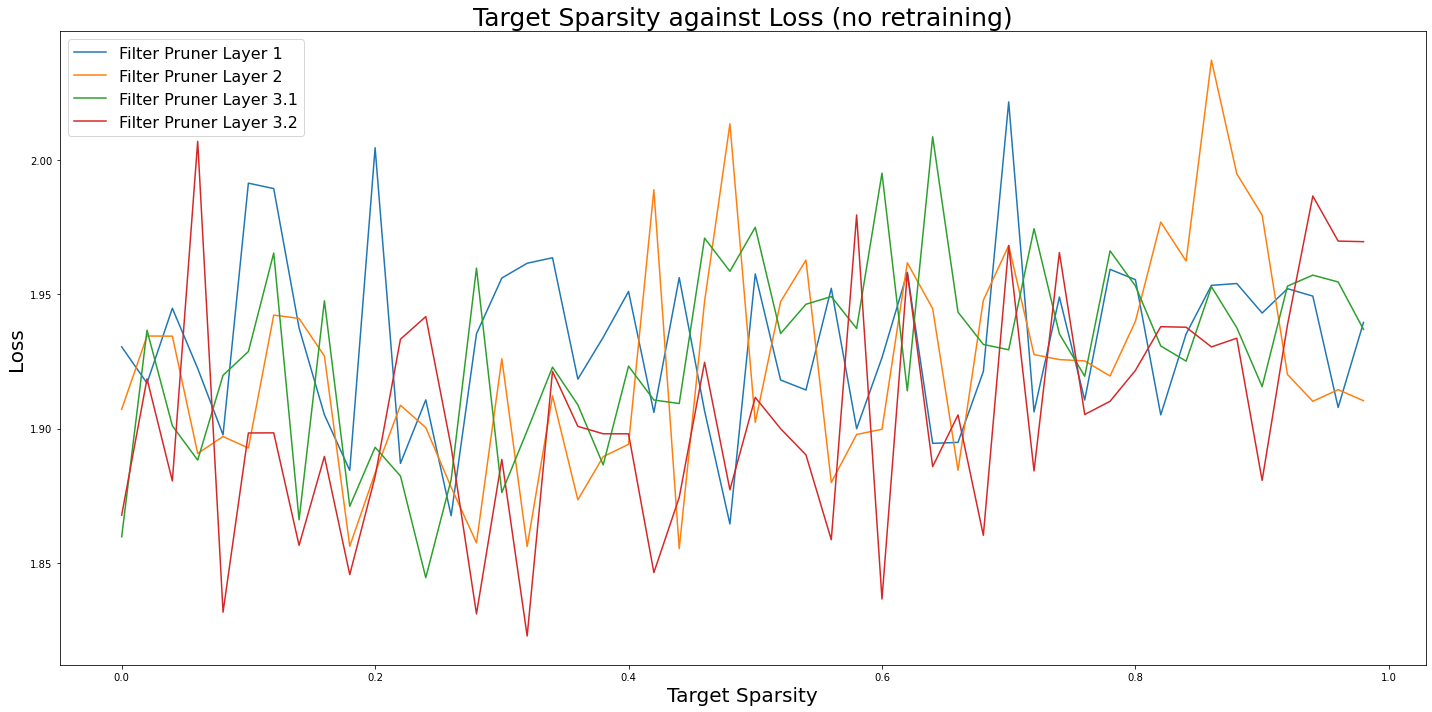

In [518]:
plot_pruners(latency_data, 'Loss', 'Target Sparsity against Loss (no retraining)')

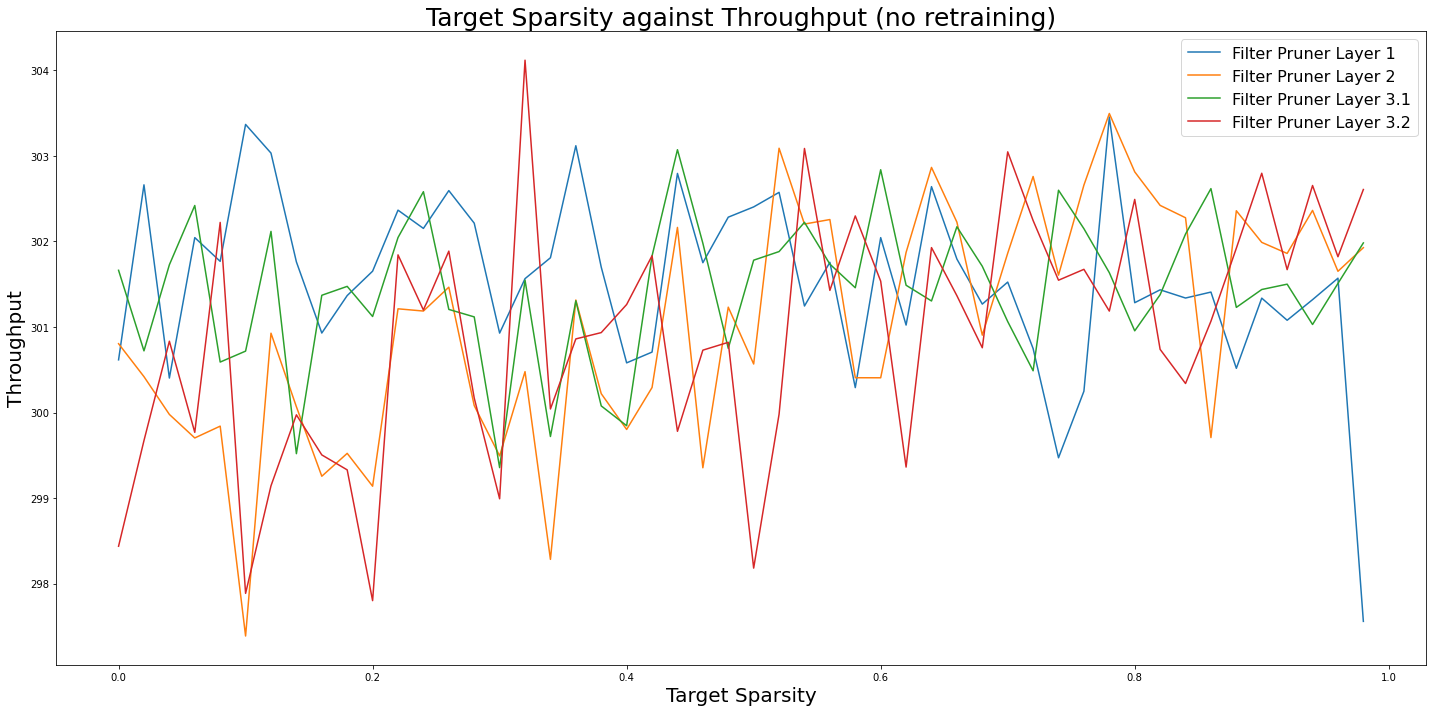

In [519]:
plot_pruners(latency_data, 'Throughput', 'Target Sparsity against Throughput (no retraining)')

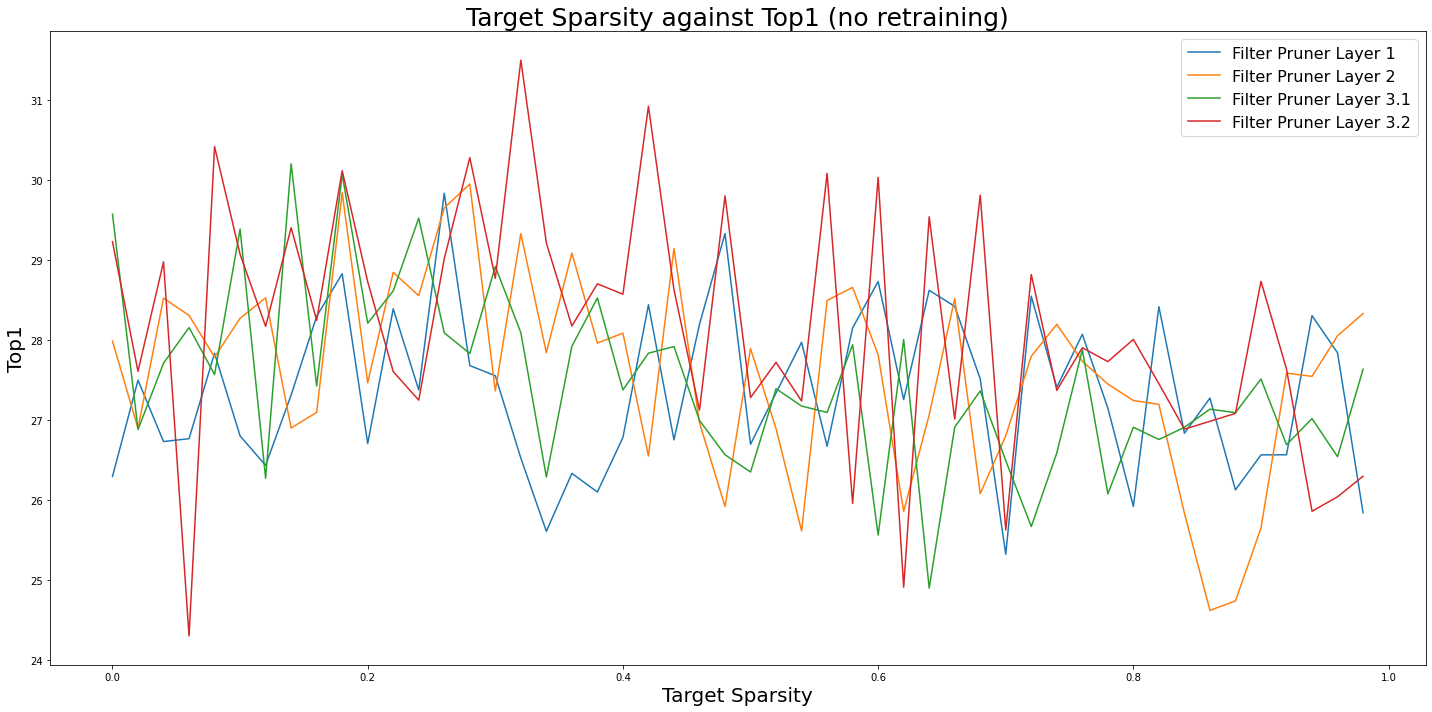

In [520]:
plot_pruners(latency_data, 'Top1', 'Target Sparsity against Top1 (no retraining)', 'mean')

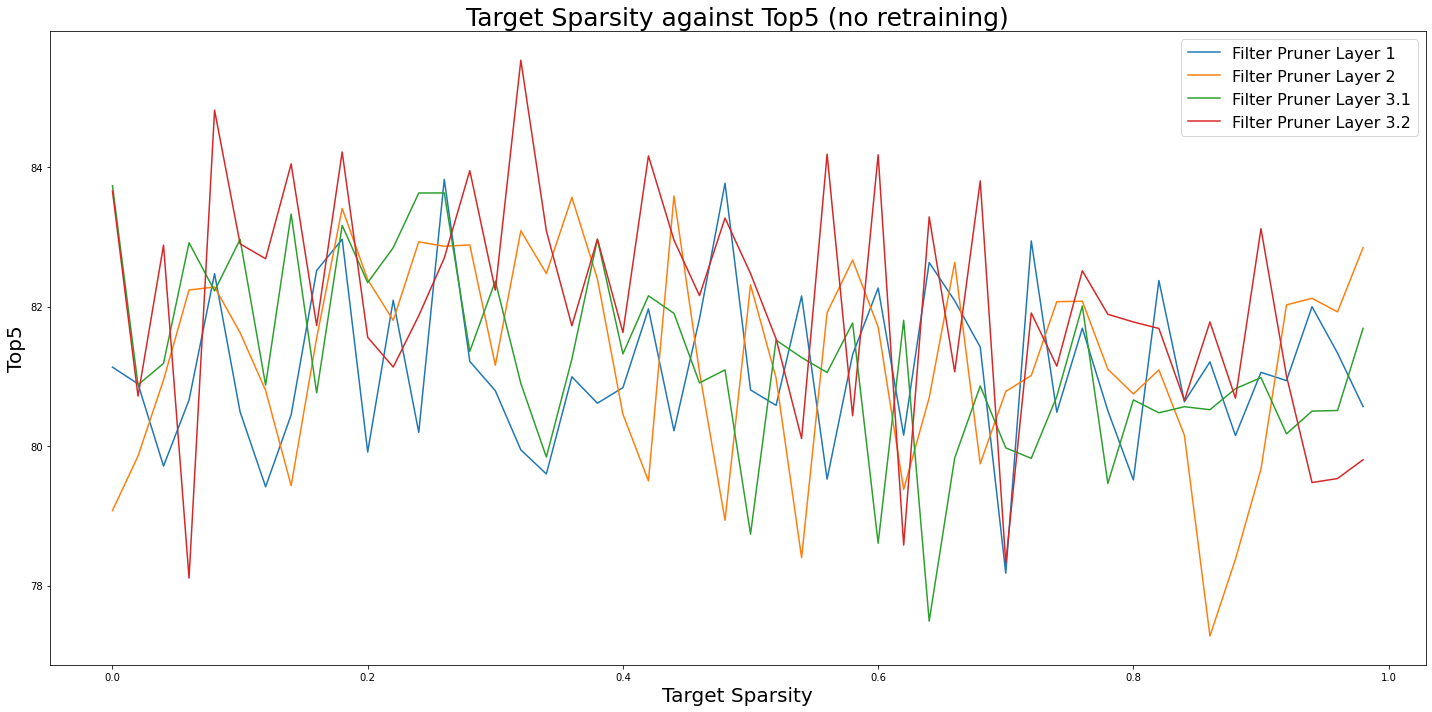

In [521]:
plot_pruners(latency_data, 'Top5', 'Target Sparsity against Top5 (no retraining)')

In [522]:
    def plot_surface(pruner_index, data, param_name='Target sparsity', latency_col_index=4, top1_col_index=7):
    
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,10))
        ax.set_xlabel('Latency')
        ax.set_ylabel('Top1')
        ax.set_zlabel(param_name)
        #ax.plot_wireframe(cParams, gammas, avg_errors_array)
        #ax.plot3D(cParams, gammas, avg_errors_array)
        #ax.scatter3D(cParams, gammas, avg_errors_array, zdir='z',cmap='viridis')


        surf = ax.plot_trisurf(data.iloc[:, latency_col_index], data.iloc[:, top1_col_index], data.iloc[:, pruner_index], cmap=cm.jet, linewidth=0.1)
        fig.colorbar(surf, shrink=0.5, aspect=5)    
        #plt.savefig('./plots/avgErrs_vs_C_andgamma_type_%s.png'%(k))
        plt.show()

In [523]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Latency: 4
# Top1 : 7
t_latency = latency_data.iloc[:,4]
t_Top1 = latency_data.iloc[:,7]
results = pd.concat([t_latency, t_Top1], axis=1, join='inner')

norm_results = StandardScaler().fit_transform(results)

In [546]:
filters = latency_data.iloc[:,0:4]
norm_filters = StandardScaler().fit_transform(filters)
pca_f = PCA(n_components=1)
pca_filters = pca_r.fit_transform(norm_filters)

pca_df_filters = pd.concat([pd.DataFrame(pca_results, columns=['PCA_filters']), results], axis=1, join='inner')
#pca_f.explained_variance_ratio_

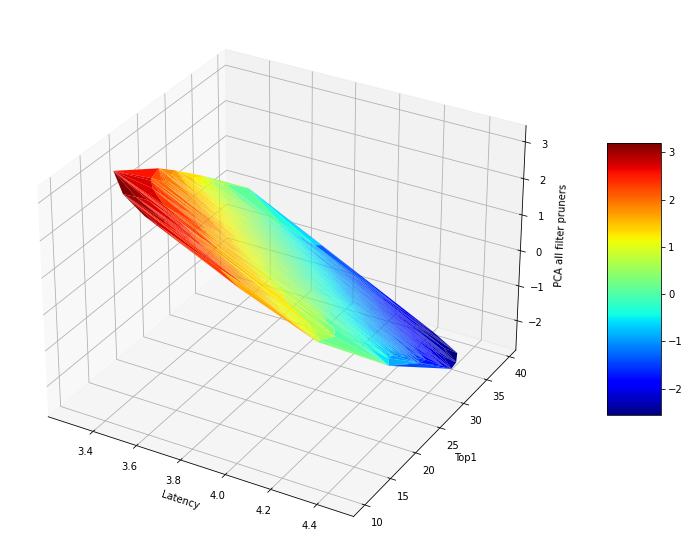

In [547]:
plot_surface(0, pca_df_filters, param_name='PCA all filter pruners', latency_col_index=1, top1_col_index=2)

C:\Users\fried\.conda\envs\DissertationVis\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\fried\.conda\envs\DissertationVis\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


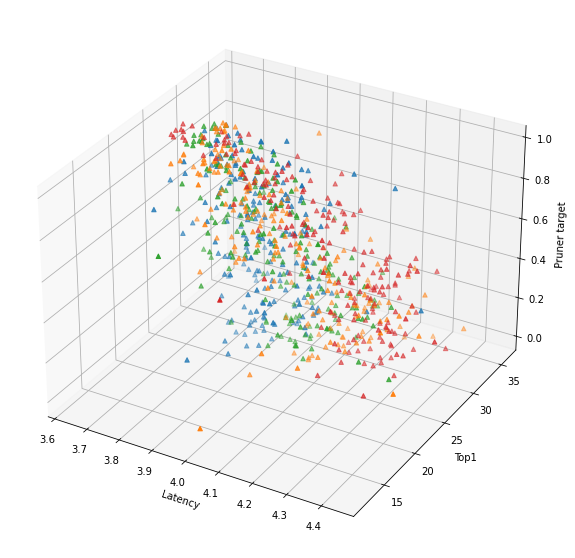

In [545]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')


for i in range(4):
    fp = sorted(build_line(latency_data.to_numpy(), i, 4))
    x, y, z, w = bin_to_param_step(fp, 0.005)

    fp = sorted(build_line(latency_data.to_numpy(), i, 7))
    x, y_hat, z, w = bin_to_param_step(fp, 0.005)
    xs = y # array n elements long
    ys = y_hat
    zs = x
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('Latency')
ax.set_ylabel('Top1')
ax.set_zlabel('Pruner target')

plt.show()

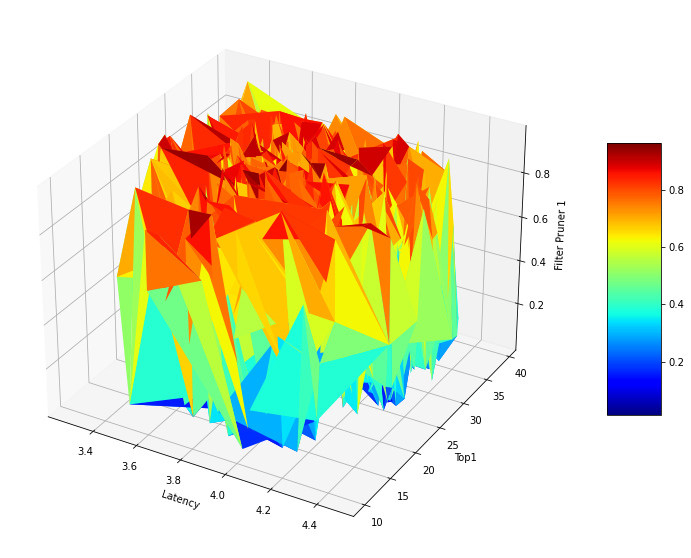

In [540]:
plot_surface(0, latency_data, param_name='Filter Pruner 1')

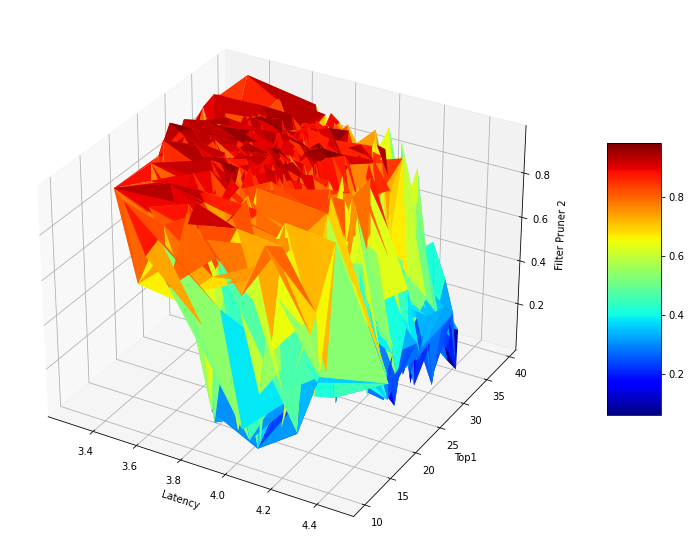

In [541]:
plot_surface(1, latency_data, param_name='Filter Pruner 2')

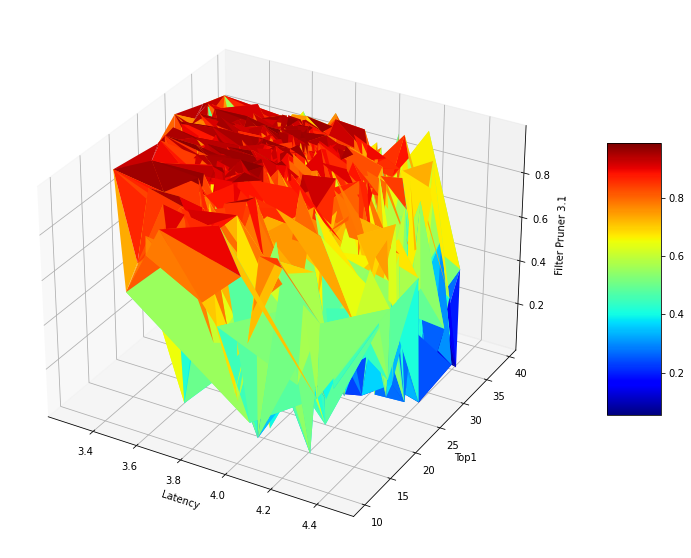

In [542]:
plot_surface(2, latency_data, param_name='Filter Pruner 3.1')

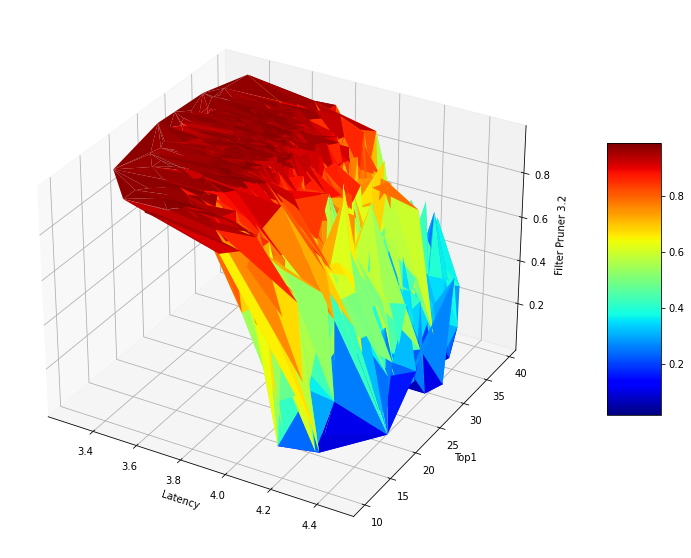

In [543]:
plot_surface(3, latency_data, param_name='Filter Pruner 3.2')

In [537]:
Z = Z * 100
bilinear_interpolate(Z, X_ref, Y_ref)

<ipython-input-415-66470970278f>:25: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "bilinear_interpolate" failed type inference due to: Invalid use of BoundFunction(array.astype for array(float64, 2d, C)) with parameters (Function(<class 'int'>))

During: resolving callee type: BoundFunction(array.astype for array(float64, 2d, C))
During: typing of call at <ipython-input-415-66470970278f> (30)


File "<ipython-input-415-66470970278f>", line 30:
def bilinear_interpolate(im, x, y):
    <source elided>

    x0 = np.floor(x).astype(int)
    ^

  @jit
C:\Users\fried\.conda\envs\DissertationVis\lib\site-packages\numba\core\object_mode_passes.py:152: NumbaWarning: Function "bilinear_interpolate" was compiled in object mode without forceobj=True.

File "<ipython-input-415-66470970278f>", line 26:
@jit
def bilinear_interpolate(im, x, y):
^

  state.func_ir.loc))
C:\Users\fried\.conda\envs\DissertationVis\lib\site-packages\numba\core\object_m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [538]:
fp_20 = sorted(build_line(latency_data.to_numpy(), 0, 7))
x, y_hat, z, w = bin_to_param_step(fp_20, 0.02)
x

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [539]:
np.array(get_index_array(latency_data, 'filter_pruner_20', 'Latency', (0, 0.02), Y_ref))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [330]:
np.array(get_index_array(latency_data, 'filter_pruner_20', 'Top1', x, X_ref))

array([21, 16, 24, ..., 25, 40, 34])

In [335]:
X_ref = np.arange(10, 40, 0.3) # Top1
Y_ref = np.arange(3, 5, 0.02) # Latency
X_ref.shape, Y_ref.shape

((100,), (100,))

In [192]:
# Get all rows from latency data with filter pruner inside range
out = latency_data.query('filter_pruner_20 >= 0.0')
out = out.query('filter_pruner_20 < 0.02')
out

filter_pruner_20  filter_pruner_40  filter_pruner_60  filter_pruner_70  \
23            0.008486          0.977750          0.542741          0.972721   
109           0.017729          0.947853          0.340675          0.961211   
170           0.003946          0.609692          0.798519          0.945043   
175           0.018518          0.940056          0.803981          0.962596   
196           0.000713          0.869321          0.898146          0.904249   
220           0.018078          0.843722          0.500790          0.981791   
244           0.004111          0.755703          0.922146          0.943135   
252           0.008210          0.769107          0.112449          0.968454   
285           0.012389          0.667864          0.080617          0.905900   
306           0.013686          0.754025          0.974446          0.807774   
410           0.000332          0.773478          0.366422          0.943652   
411           0.013316          0.979563          0.935001          0.950730   
416           0.017712          0.696120          0.989166          0.887650   
419           0.018886          0.988778          0.804204          0.934037   
423           0.014683          0.830177          0.523420          0.973090   
466           0.004891          0.607532          0.079878          0.965817   
511           0.015296          0.360764          0.781360          0.962882   
580           0.013510          0.835299          0.761833          0.878182   
598           0.007622          0.830573          0.938758          0.854835   
604           0.014972          0.508704          0.951304          0.966589   
615           0.015987          0.879557          0.053575          0.956525   
635           0.017636          0.366248          0.431606          0.970713   
681           0.003205          0.643346          0.971928          0.911770   
703           0.002751          0.623054          0.714999          0.985922   
718           0.013017          0.924861          0.565114          0.937229   
828           0.012035          0.977295          0.299791          0.899646   
869           0.012568          0.630177          0.879766          0.867034   
882           0.010544          0.912644          0.427016          0.565911   
900           0.017793          0.700099          0.515901          0.884681   
986           0.019389          0.971068          0.850037          0.536598   
1005          0.004695          0.647411          0.960967          0.831303   
1007          0.013855          0.879343          0.497548          0.844895   
1183          0.007415          0.159367          0.250035          0.788714   
1190          0.003939          0.057067          0.888027          0.837675   
1216          0.013031          0.106996          0.107218          0.860682   
1228          0.016890          0.975316          0.114839          0.737333   
1231          0.004668          0.785255          0.029940          0.668436   
1293          0.017570          0.384803          0.883226          0.503954   
1295          0.015127          0.390334          0.154154          0.804347   
1354          0.015212          0.466072          0.266806          0.127708   
1384          0.001375          0.408937          0.903382          0.052835   
1387          0.013945          0.022220          0.100019          0.864967   
1413          0.009602          0.088249          0.257019          0.196977   
1501          0.004215          0.352845          0.322724          0.227247   
1505          0.017456          0.355457          0.583057          0.473061   
1519          0.002934          0.592156          0.086425          0.109458   

      Latency   Loss  Throughput   Top1   Top5  Total_Latency  
23      3.364  1.974      304.16  22.84  79.72          12.94  
109     3.572  2.025      306.61  19.87  78.40          12.91  
170     3.612  2.033      299.10  24.47  83.88       

In [197]:
out.iloc[0].loc['Top1']

22.84

In [210]:
X = np.arange(10, 40, 0.6) # Top1
X

array([10. , 10.6, 11.2, 11.8, 12.4, 13. , 13.6, 14.2, 14.8, 15.4, 16. ,
       16.6, 17.2, 17.8, 18.4, 19. , 19.6, 20.2, 20.8, 21.4, 22. , 22.6,
       23.2, 23.8, 24.4, 25. , 25.6, 26.2, 26.8, 27.4, 28. , 28.6, 29.2,
       29.8, 30.4, 31. , 31.6, 32.2, 32.8, 33.4, 34. , 34.6, 35.2, 35.8,
       36.4, 37. , 37.6, 38.2, 38.8, 39.4])

In [147]:
Y

array([[3.  , 3.  , 3.  , ..., 3.  , 3.  , 3.  ],
       [3.04, 3.04, 3.04, ..., 3.04, 3.04, 3.04],
       [3.08, 3.08, 3.08, ..., 3.08, 3.08, 3.08],
       ...,
       [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
       [4.92, 4.92, 4.92, ..., 4.92, 4.92, 4.92],
       [4.96, 4.96, 4.96, ..., 4.96, 4.96, 4.96]])

In [148]:

fp_20 = sorted(build_line(latency_data.to_numpy(), 0, 4))
x, y, z, w = bin_to_param_step(fp_20, 0.02)

In [149]:
np.array((y.tolist(),y.tolist())).shape

(2, 50)

In [150]:
X = np.arange(10, 40, 0.6)
Y = np.arange(3, 5, 0.04)
print(X.shape)
print(Y.shape)


(50,)
(50,)


In [151]:
X, Y = np.meshgrid(X, Y)
print(X.shape)
print(Y.shape)

(50, 50)
(50, 50)


In [152]:
X

array([[10. , 10.6, 11.2, ..., 38.2, 38.8, 39.4],
       [10. , 10.6, 11.2, ..., 38.2, 38.8, 39.4],
       [10. , 10.6, 11.2, ..., 38.2, 38.8, 39.4],
       ...,
       [10. , 10.6, 11.2, ..., 38.2, 38.8, 39.4],
       [10. , 10.6, 11.2, ..., 38.2, 38.8, 39.4],
       [10. , 10.6, 11.2, ..., 38.2, 38.8, 39.4]])

In [153]:
Y

array([[3.  , 3.  , 3.  , ..., 3.  , 3.  , 3.  ],
       [3.04, 3.04, 3.04, ..., 3.04, 3.04, 3.04],
       [3.08, 3.08, 3.08, ..., 3.08, 3.08, 3.08],
       ...,
       [4.88, 4.88, 4.88, ..., 4.88, 4.88, 4.88],
       [4.92, 4.92, 4.92, ..., 4.92, 4.92, 4.92],
       [4.96, 4.96, 4.96, ..., 4.96, 4.96, 4.96]])